### Adversarial Trained Models Evaluation Metrics

In [28]:
# Eval metrics data paths
pretrained_evals = {'SQuAD': './eval_output', 'addCommon': './adv_addCommon/eval_output', 'addAny': './adv_addAny/eval_output', 'addSent': './adv_addSent/eval_output'}
fine_tuned_v1_evals = {'SQuAD': './new_eval_outputs/adv_combined/base_squad', 'addCommon': './new_eval_outputs/adv_combined/adv_addCommon', 'addAny': './new_eval_outputs/adv_combined/adv_addAny', 'addSent': './new_eval_outputs/adv_combined/adv_addSent'}
fine_tuned_v2_evals = {'SQuAD': './new_eval_outputs/adv_combined_v2/base_squad', 'addCommon': './new_eval_outputs/adv_combined_v2/adv_addCommon', 'addAny': './new_eval_outputs/adv_combined_v2/adv_addAny', 'addSent': './new_eval_outputs/adv_combined_v2/adv_addSent'}


#### Base vs Adversarial Sets Only vs Combined Sets Model F1

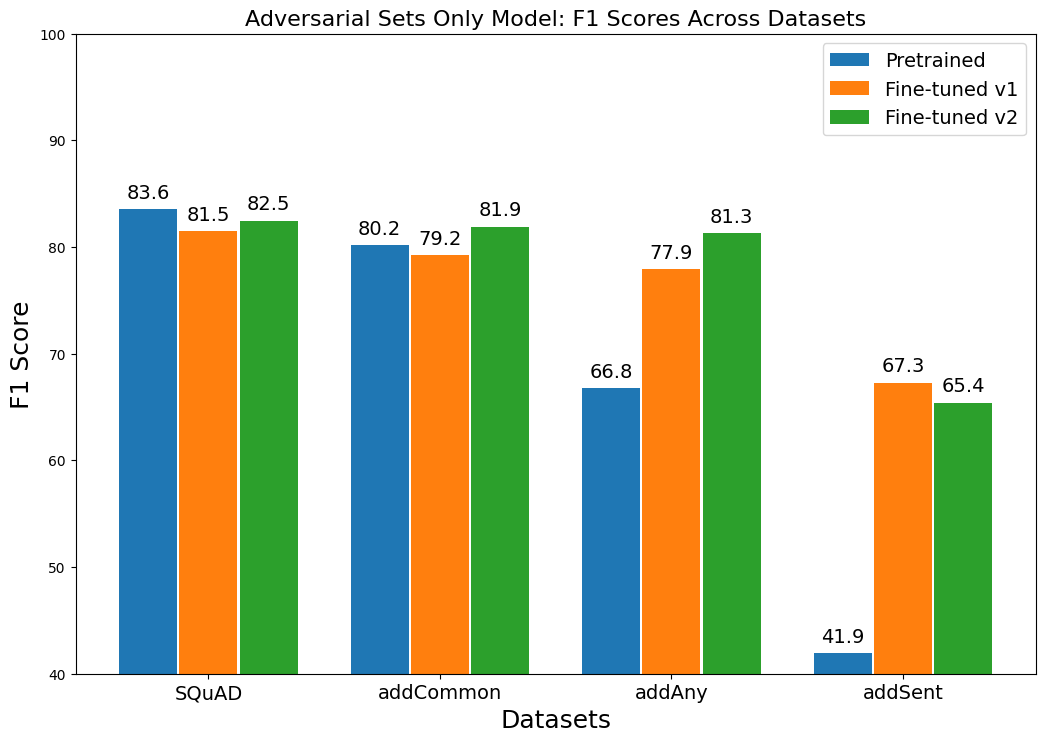

In [46]:
import json
import matplotlib.pyplot as plt

def plot_f1_results(title):
    # Load the data from the JSON files
    def load_f1_scores(eval_paths):
        f1_scores = {}
        for key, path in eval_paths.items():
            with open(f"{path}/eval_metrics.json", 'r') as file:
                data = json.load(file)
                f1_scores[key] = data['eval_f1']
        return f1_scores

    pretrained_scores = load_f1_scores(pretrained_evals)
    fine_tuned_v1_scores = load_f1_scores(fine_tuned_v1_evals)
    fine_tuned_v2_scores = load_f1_scores(fine_tuned_v2_evals)

    # Define the datasets
    datasets = list(pretrained_evals.keys())

    # Plot the F1 scores
    fig, ax = plt.subplots(figsize=(12, 8))
    bar_width = 0.25
    padding = 0.01
    index = range(len(datasets))

    bar1 = plt.bar([i - bar_width - padding for i in index], [pretrained_scores[dataset] for dataset in datasets], bar_width, label='Pretrained')
    bar2 = plt.bar([i for i in index], [fine_tuned_v1_scores[dataset] for dataset in datasets], bar_width, label='Fine-tuned v1')
    bar3 = plt.bar([i + bar_width + padding for i in index], [fine_tuned_v2_scores[dataset] for dataset in datasets], bar_width, label='Fine-tuned v2')

    # Add labels for each bar
    for i, dataset in enumerate(datasets):
        plt.text(i - bar_width - padding, pretrained_scores[dataset] + 1, f"{pretrained_scores[dataset]:.1f}", ha='center', fontsize=14)
        plt.text(i, fine_tuned_v1_scores[dataset] + 1, f"{fine_tuned_v1_scores[dataset]:.1f}", ha='center', fontsize=14)
        plt.text(i + bar_width + padding, fine_tuned_v2_scores[dataset] + 1, f"{fine_tuned_v2_scores[dataset]:.1f}", ha='center', fontsize=14)

    # Add titles and labels
    plt.xlabel('Datasets', fontsize=18)
    plt.ylabel('F1 Score', fontsize=18)
    plt.title(title, fontsize=16)
    plt.ylim(40, 100)
    plt.xticks([i for i in index], datasets, fontsize=14)
    plt.legend(fontsize=14)  # Increase the font size of the legend

    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Add padding around the whole chart
    plt.show()

plot_f1_results('Adversarial Sets Only Model: F1 Scores Across Datasets')